In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('pima_indian_diabetes.csv',header=0,names=range(0,8))

In [3]:
ds

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [5]:
df=pd.DataFrame(data=ds)
df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [6]:
dfx=df.iloc[:,0:7]
dfx

,0,1,2,3,4,5,6
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [8]:
dfy=df.iloc[:,-1]
dfy

1     0
8     1
1     0
0     1
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 767, dtype: int64

In [9]:
dfy.value_counts()

0    500
1    267
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

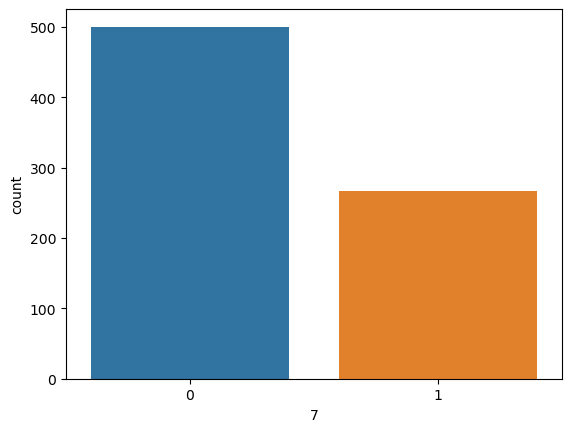

In [10]:
sns.countplot(dfy)

In [11]:
import sklearn
sklearn.__version__

'1.0.2'

In [13]:
!pip install scikit-learn

In [15]:
import numpy
numpy.__version__

'1.21.5'

In [16]:
pip install imblearn



     ------------------------------------ 226.0/226.0 kB 918.1 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [19]:
trainx.value_counts()

0    1   2   3    4          5         6 
0    48  20  0    24.700000  0.140000  22    1
137  84  27  0    27.300000  0.231000  59    1
136  74  26  135  26.000000  0.647000  51    1
         50  204  37.400000  0.399000  24    1
     76  36  100  36.152385  0.213016  39    1
                                            ..
109  67  0   0    31.764069  0.290896  42    1
     68  0   0    29.584496  0.889143  33    1
     72  0   0    31.576280  0.694771  29    1
     75  26  0    36.000000  0.546000  60    1
199  76  43  0    42.900000  1.394000  22    1
Length: 1000, dtype: int64

In [20]:
trainy.value_counts()

0    500
1    500
Name: 7, dtype: int64

In [21]:
trainy

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: 7, Length: 1000, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

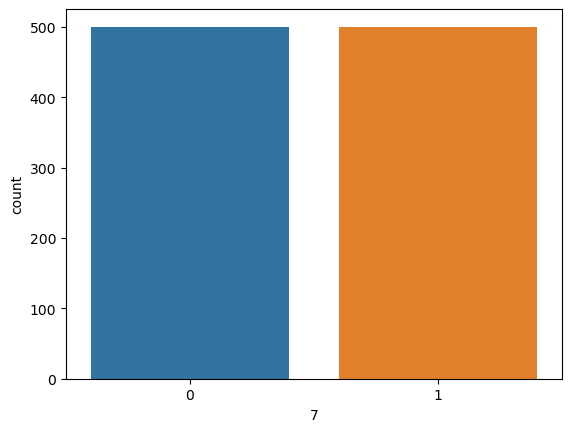

In [22]:
sns.countplot(trainy)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_x,test_x,train_y,test_y=train_test_split(trainx,trainy,test_size=.30,random_state=45)

In [25]:
train_x.shape

(700, 7)

In [26]:
train_y.shape

(700,)

In [27]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
lg.score(train_x,train_y)

pred=lg.predict(test_x)

from sklearn.metrics import accuracy_score
print(round(accuracy_score(test_y,pred),2))

0.72


In [28]:
dfiris=pd.read_csv('iris.csv')
dfiris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
dfiris.sample(3)

,sepal length,sepal width,petal length,petal width,class
141,6.9,3.1,5.1,2.3,Iris-virginica
28,5.2,3.4,1.4,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica


In [31]:
dfiris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [32]:
winedf=pd.read_csv('winequality-red.csv')
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
winedf.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
177,7.5,0.52,0.42,2.3,0.087,8.0,38.0,0.9972,3.58,0.61,10.5,6
575,12.3,0.27,0.49,3.1,0.079,28.0,46.0,0.9993,3.20,0.80,10.2,6
72,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.9961,3.31,0.48,9.5,5


In [34]:
winedf['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

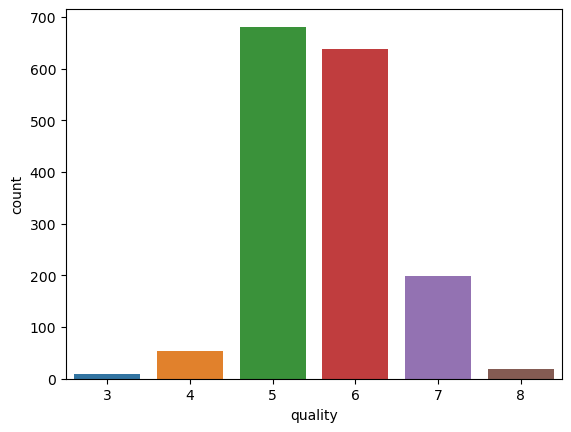

In [35]:
sns.countplot(winedf['quality'])

In [36]:
x=winedf.iloc[:,0:-1]
y=winedf.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [37]:
y.shape

(1599,)

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrainw,ytrainw=sm.fit_resample(x,y)
ytrainw

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [39]:
ytrainw.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

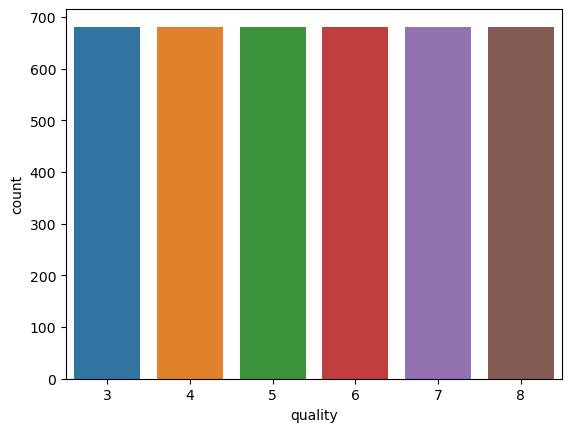

In [40]:
sns.countplot(ytrainw)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

xtrain,xtest,ytrain,ytest=train_test_split(xtrainw,ytrainw,test_size=.30,random_state=45)

dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

prd=dtc.predict(xtest)
print('accuracy:',accuracy_score(ytest,prd))
confusion_matrix(ytest,prd)

accuracy: 0.7740619902120718


array([[209,   3,   4,   4,   0,   0],
       [  3, 164,  18,  10,   1,   0],
       [  4,  27, 124,  40,   4,   0],
       [  2,  10,  45, 107,  34,   9],
       [  2,   2,   9,  31, 150,   6],
       [  0,   0,   1,   3,   5, 195]], dtype=int64)